### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
# Code starts here
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# submission = pd.read_csv('sample_submission.csv')
train.info(), train.describe()

# Code ends here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 11 columns):
ages                 8582 non-null int64
list_price           8582 non-null float64
num_reviews          8582 non-null int64
piece_count          8582 non-null int64
play_star_rating     8582 non-null float64
review_difficulty    8582 non-null int64
star_rating          8582 non-null float64
theme_name           8582 non-null int64
val_star_rating      8582 non-null float64
country              8582 non-null int64
Id                   8582 non-null int64
dtypes: float64(4), int64(7)
memory usage: 737.6 KB


(None,
               ages   list_price  num_reviews  piece_count  play_star_rating  \
 count  8582.000000  8582.000000  8582.000000  8582.000000       8582.000000   
 mean     16.649149    64.493463    14.680727   486.677464          3.697809   
 std       8.186261    89.871631    34.867561   802.789725          1.653742   
 min       0.000000     2.272400     0.000000     1.000000          0.000000   
 25%      11.000000    19.990000     1.000000    95.000000          3.600000   
 50%      19.000000    36.587800     4.000000   214.000000          4.400000   
 75%      23.000000    71.298000    12.000000   544.000000          4.700000   
 max      30.000000  1104.870000   367.000000  7541.000000          5.000000   
 
        review_difficulty  star_rating   theme_name  val_star_rating  \
 count        8582.000000  8582.000000  8582.000000      8582.000000   
 mean            1.994640     3.904649    20.482172         3.597448   
 std             1.792387     1.617678    11.948618    

In [3]:
train.isnull().sum(), train.shape, test.shape

(ages                 0
 list_price           0
 num_reviews          0
 piece_count          0
 play_star_rating     0
 review_difficulty    0
 star_rating          0
 theme_name           0
 val_star_rating      0
 country              0
 Id                   0
 dtype: int64,
 (8582, 11),
 (3679, 10))

In [4]:
train.tail()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
8577,29,152.4878,13,955,4.1,0,3.7,10,3.0,13,8577
8578,19,18.2878,0,119,0.0,5,0.0,17,0.0,6,8578
8579,23,36.5878,6,76,4.2,2,4.5,12,3.4,15,8579
8580,0,12.1878,3,119,4.5,2,5.0,4,4.5,13,8580
8581,23,11.6922,1,56,4.0,2,5.0,12,5.0,3,8581


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

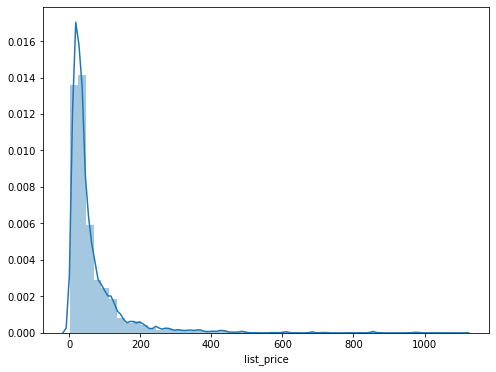

In [5]:
# Code starts here
plt.figure(figsize = (8,6))
sns.distplot(train['list_price'])
# Code ends here.

Target variable is positive skewed.

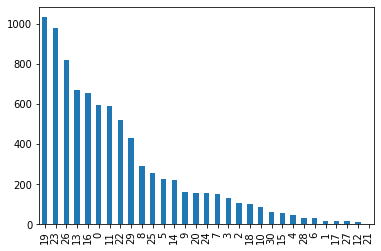

In [6]:
train['ages'].value_counts().sort_values(ascending = False).plot(kind = 'bar')


In [7]:
X = train.drop('list_price', axis = 1)
Y = train['list_price']

In [8]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

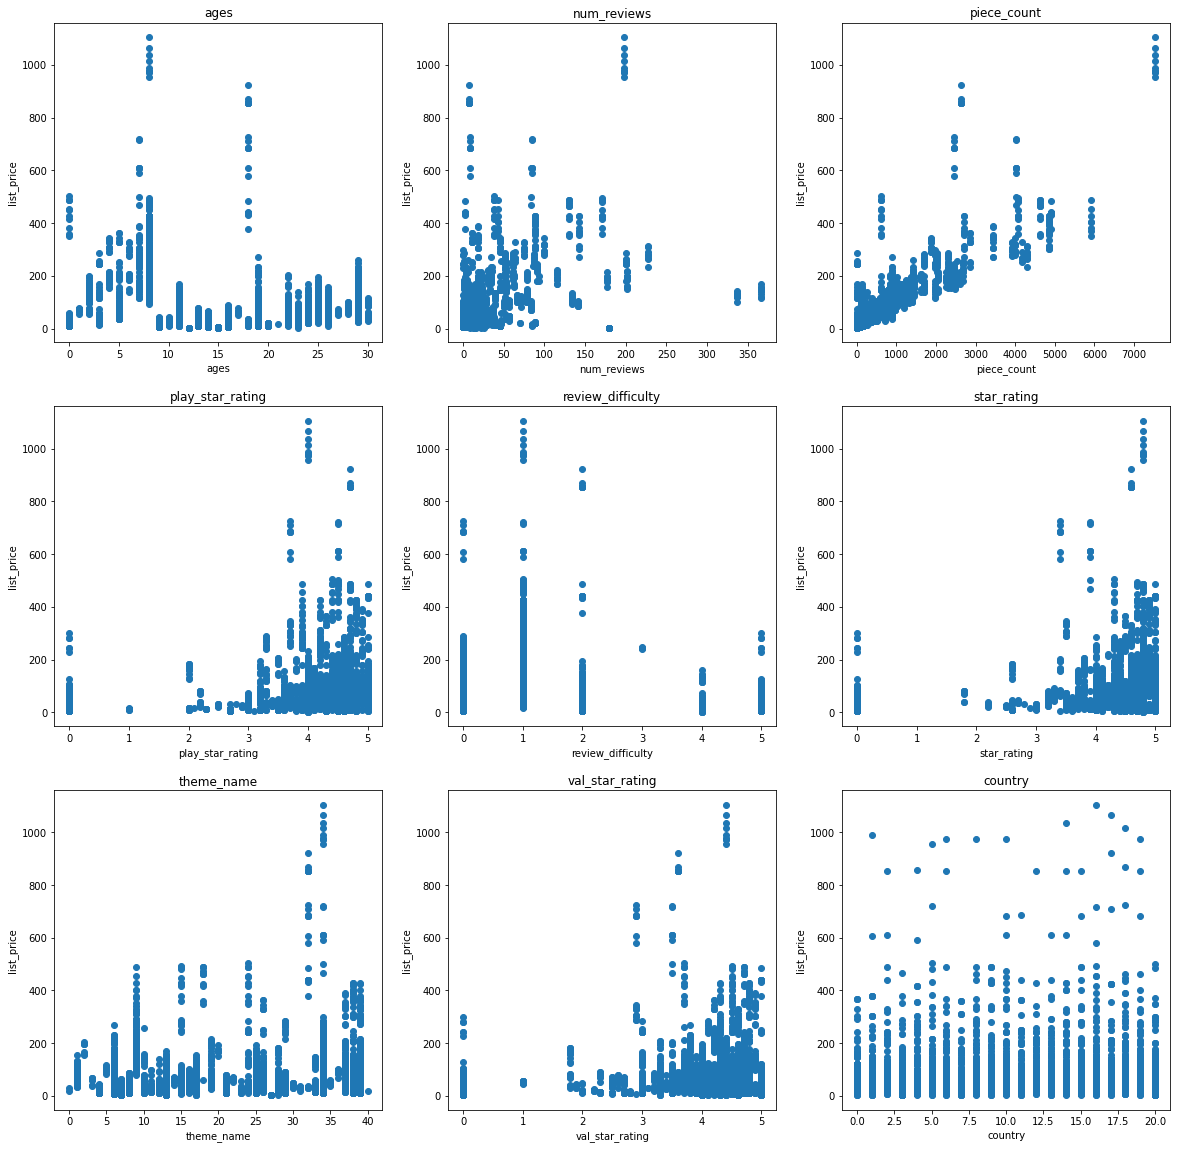

In [9]:
cols = X_train.columns
fig, axes = plt.subplots(nrows= 3, ncols = 3, figsize=(20,20))
for i in range(0,3):
    for j in range(0,3):
        col = cols[i*3 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col], Y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('list_price')
        

In [10]:
corr = train.corr()
corr

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
ages,1.000000,-0.076763,-0.160969,-0.090685,0.232847,-0.239683,0.102633,0.476178,0.116349,-0.001526,0.012979
list_price,-0.076763,1.000000,0.439499,0.866119,0.145151,-0.284760,0.126577,0.192707,0.114612,0.018192,-0.004015
num_reviews,-0.160969,0.439499,1.000000,0.542924,0.151801,-0.196846,0.160762,0.012342,0.172431,0.001953,-0.004335
piece_count,-0.090685,0.866119,0.542924,1.000000,0.174411,-0.312239,0.180903,0.173318,0.192863,0.002506,-0.001435
play_star_rating,0.232847,0.145151,0.151801,0.174411,1.000000,-0.670508,0.902573,0.151078,0.921824,-0.000958,-0.005477
review_difficulty,-0.239683,-0.284760,-0.196846,-0.312239,-0.670508,1.000000,-0.637901,-0.153948,-0.650333,0.006417,0.002682
star_rating,0.102633,0.126577,0.160762,0.180903,0.902573,-0.637901,1.000000,0.065264,0.908720,-0.003865,-0.007639
theme_name,0.476178,0.192707,0.012342,0.173318,0.151078,-0.153948,0.065264,1.000000,0.097430,-0.003625,-0.001884
val_star_rating,0.116349,0.114612,0.172431,0.192863,0.921824,-0.650333,0.908720,0.097430,1.000000,0.002413,-0.016912
country,-0.001526,0.018192,0.001953,0.002506,-0.000958,0.006417,-0.003865,-0.003625,0.002413,1.000000,-0.028541


High correlation between star_rating, play_star_rating and val_star_rating. So dropped any 2 of them

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [11]:
# Code starts here
X_train.drop(['play_star_rating','val_star_rating', 'Id'], axis = 1, inplace = True)
X_test.drop(['play_star_rating', 'val_star_rating', 'Id'], axis = 1, inplace = True)

# Code ends here.

### Model building

In [12]:
# Code starts here

reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('mean squared error', mse)
print('R square',r2)








# Code ends here.

mean squared error 2034.8577609007057
R square 0.733711747859632


### Residual check!

- Check the distribution of the residual.

Text(0.5, 1.0, 'Distribution of residual')

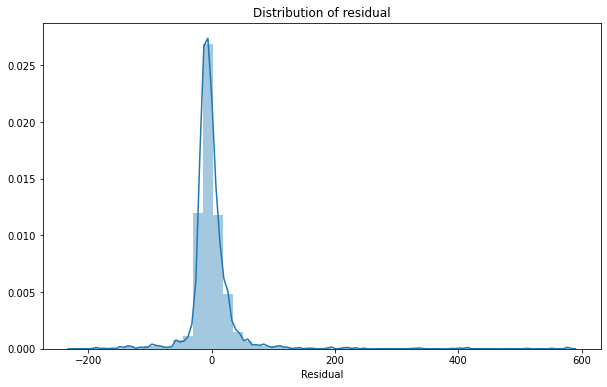

In [13]:
# Code starts here

residual = Y_test - Y_pred
plt.figure(figsize=(10,6))
sns.distplot(residual)
plt.xlabel('Residual')
plt.title('Distribution of residual')









# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [14]:
# Code starts here


test_x = test.drop(['play_star_rating','val_star_rating', 'Id'], axis = 1)
test['list_price'] = reg.predict(test_x)
# Code ends here.

In [15]:
submission = test[['Id', 'list_price']]
submission.tail()


,Id,list_price
3674,2144,12.313889
3675,7242,71.842570
3676,11631,27.086956
3677,4639,15.225990
3678,7269,19.517445


In [16]:

test.tail()


,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id,list_price
3674,13,1,75,5.0,5,5.0,21,5.0,2,2144,12.313889
3675,26,21,494,4.6,0,4.5,38,4.8,10,7242,71.842570
3676,26,3,85,4.7,2,4.7,34,4.7,18,11631,27.086956
3677,11,3,28,5.0,2,5.0,13,4.5,6,4639,15.225990
3678,0,1,136,0.0,5,5.0,4,0.0,11,7269,19.517445


In [17]:
submission.to_csv('sample_submission.csv')